In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv',header=0)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Module 2: Data Wrangling


Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Question 2**

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [13]:
mean=df['bedrooms'].mean()
df['bedrooms']= df['bedrooms'].replace(np.nan,mean)

In [14]:
mean=df['bathrooms'].mean()
df['bedrooms']= df['bathrooms'].replace(np.nan,mean)

In [15]:
import numpy as np
import pandas as pd


columns_to_replace = ["floors", "waterfront", "lat", "bedrooms", 
                      "sqft_basement", "view", "bathrooms", 
                      "sqft_living15", "sqft_above", "grade", 
                      "sqft_living"]


for column in columns_to_replace:
    mean = df[column].mean()  
    df[column] = df[column].replace(np.nan, mean)  


In [16]:
for column in columns_to_replace:
    nan_count = df[column].isnull().sum()
    print(f"Number of NaN values for the column '{column}': {nan_count}")

Number of NaN values for the column 'floors': 0
Number of NaN values for the column 'waterfront': 0
Number of NaN values for the column 'lat': 0
Number of NaN values for the column 'bedrooms': 0
Number of NaN values for the column 'sqft_basement': 0
Number of NaN values for the column 'view': 0
Number of NaN values for the column 'bathrooms': 0
Number of NaN values for the column 'sqft_living15': 0
Number of NaN values for the column 'sqft_above': 0
Number of NaN values for the column 'grade': 0
Number of NaN values for the column 'sqft_living': 0


# Module 3: Exploratory Data Analysis


**Question3**

In [18]:

value_counts = df['floors'].value_counts()
value_counts_df = value_counts.to_frame().reset_index()
value_counts_df.columns = ['floors', 'count']
filtered_df = value_counts_df[value_counts_df['floors'] == 1]


In [19]:
filtered_df.head()


,floors,count
0,1.0,10680


**Question 4**

Text(0, 0.5, 'Price')

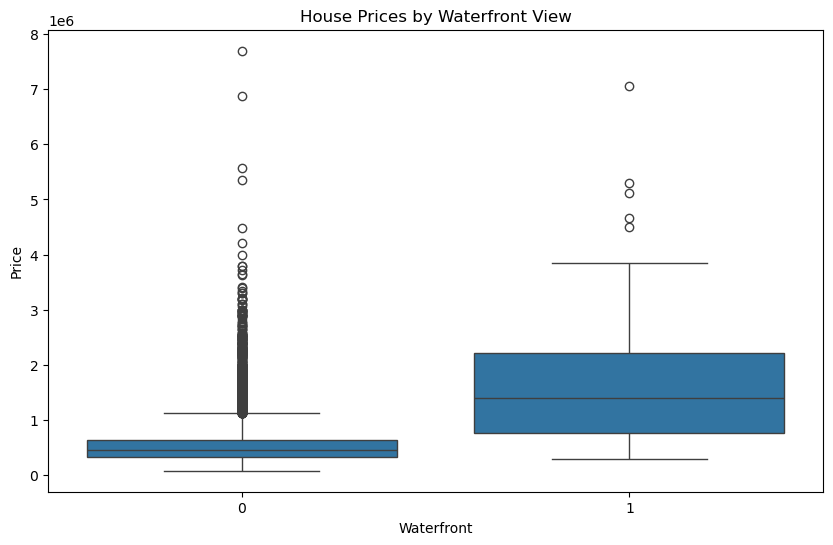

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('House Prices by Waterfront View')
plt.xlabel('Waterfront')
plt.ylabel('Price')

**Question 5**

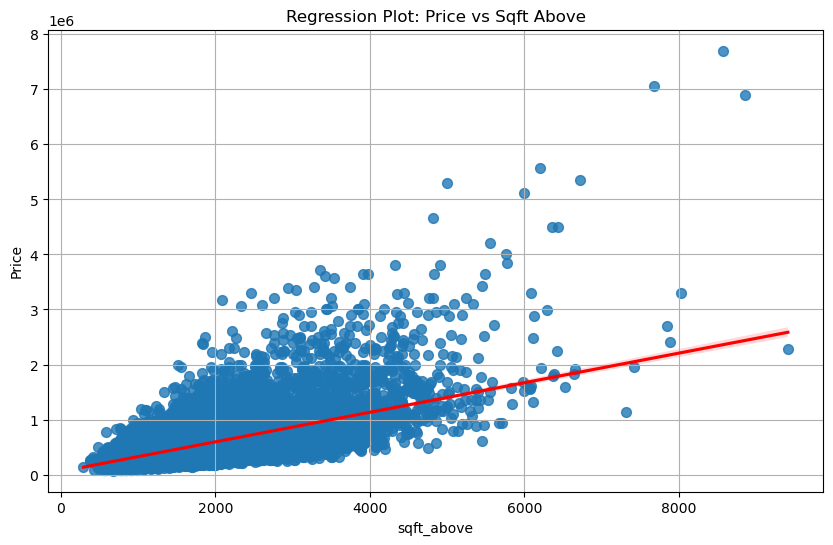

In [21]:
# Création du scatterplot avec une ligne de régression
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Price vs Sqft Above')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.grid(True)

In [22]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [23]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df._get_numeric_data()

# Calculer la matrice de corrélation pour les colonnes numériques et trier par 'price'
correlation = numeric_df.corr()['price'].sort_values()
print(correlation)


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
sqft_basement    0.323816
view             0.397293
bedrooms         0.525738
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


In [24]:
# Sélectionner uniquement les colonnes non numériques
non_numeric_df = df.select_dtypes(exclude=['number'])

# Afficher le DataFrame contenant uniquement les colonnes non numériques
print(non_numeric_df)


                  date
0      20141013T000000
1      20141209T000000
2      20150225T000000
3      20141209T000000
4      20150218T000000
...                ...
21608  20140521T000000
21609  20150223T000000
21610  20140623T000000
21611  20150116T000000
21612  20141015T000000

[21613 rows x 1 columns]


# Module 4: Model Development


In [26]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

**Question 6**

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Définir les features (X) et la cible (y)
X = df[['sqft_living']]  # Les features doivent être en 2D
y = df['price']

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur toutes les données
model.fit(X, y)

# Faire des prédictions sur les mêmes données
y_pred = model.predict(X)

# Calculer le coefficient R^2 sur l'intégralité des données
r2 = r2_score(y, y_pred)

# Afficher le coefficient R^2
print(f"R^2: {r2:.4f}")

R^2: 0.4929


**Question 7**

In [28]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [29]:
# Créer un modèle de régression linéaire
model = LinearRegression()
X= df[features]

# Entraîner le modèle sur toutes les données
model.fit(X, y)

# Calculer le coefficient R^2 directement avec model.score()
r2 = model.score(X, y)

# Afficher le coefficient R^2
print(f"R^2: {r2:.4f}")

R^2: 0.6550


**Question 8**

In [30]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [31]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
X = X.astype(float)
pipe.fit(X,Y)
ypipe=pipe.predict(X)
print(r2_score(Y,ypipe))

0.7501018605314096


# Module 5: Model Evaluation and Refinement

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [34]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


**Question 9**

In [82]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6454916347622247


**Question 10**

In [36]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7006355397867707
